In [ ]:
import pandas as pd
df = pd.read_csv("/content/pulsar_data_train.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
df["target_class"].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
#df["target_class"].replace({0.0:0,1.0:1}, inplace = True)
#df["target_class"] = int(df["target_class"])
df["target_class"] = df["target_class"].astype(int)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [ ]:
df["target_class"] = df["target_class"].replace({0.0:0,1.0:1})
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [ ]:
df.isnull().sum()/df.shape[0]

 Mean of the integrated profile                  0.000000
 Standard deviation of the integrated profile    0.000000
 Excess kurtosis of the integrated profile       0.138490
 Skewness of the integrated profile              0.000000
 Mean of the DM-SNR curve                        0.000000
 Standard deviation of the DM-SNR curve          0.094029
 Excess kurtosis of the DM-SNR curve             0.000000
 Skewness of the DM-SNR curve                    0.049888
target_class                                     0.000000
dtype: float64

In [ ]:
df[" Excess kurtosis of the integrated profile"] = df.fillna(df.groupby("target_class")[" Excess kurtosis of the integrated profile"].mean()) 

In [ ]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile          0
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [ ]:
df[" Standard deviation of the DM-SNR curve"] = df.fillna(df.groupby("target_class")[" Standard deviation of the DM-SNR curve"].mean()) 
df[" Skewness of the DM-SNR curve"] = df.fillna(df.groupby("target_class")[" Skewness of the DM-SNR curve"].mean()) 
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [ ]:
y = df["target_class"]
X = df.drop("target_class", axis = 1)

In [ ]:
X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,121.156250,-0.013165,3.168896,121.156250,7.449874,121.156250
1,76.968750,36.175557,76.968750,3.388719,2.399666,76.968750,9.414652,76.968750
2,130.585938,53.229534,130.585938,-0.297242,2.743311,130.585938,8.508364,130.585938
3,156.398438,48.865942,156.398438,-0.171294,17.471572,156.398438,2.958066,156.398438
4,84.804688,36.117659,84.804688,3.274125,2.790134,84.804688,8.405008,84.804688


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_data = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaler_data)
pca_d = pca.transform(scaler_data)

Text(0, 0.5, 'second')

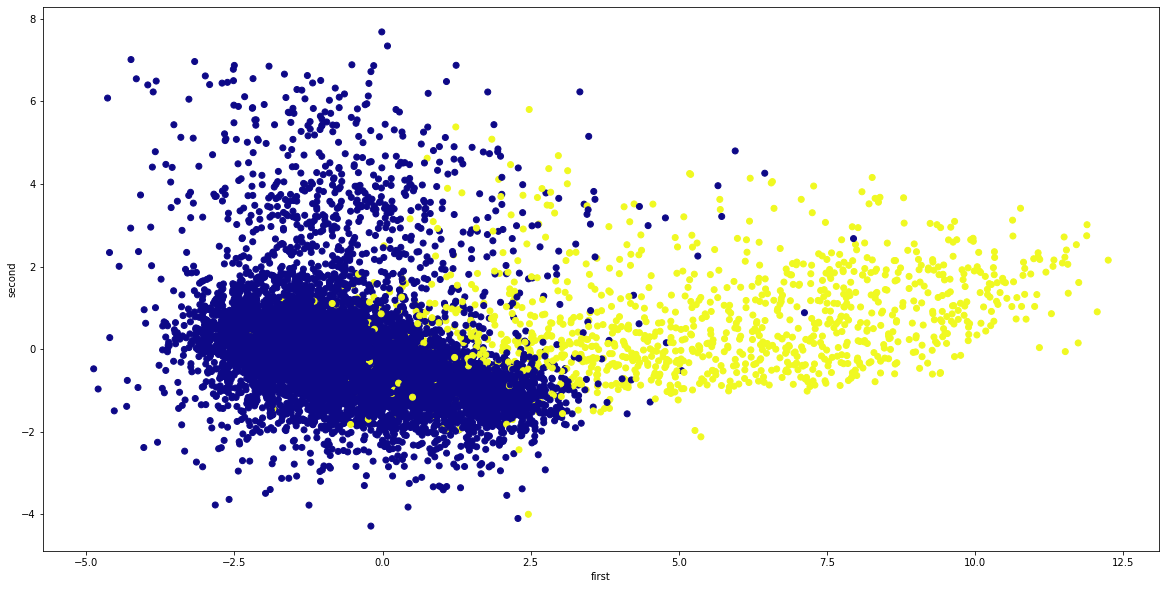

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(pca_d[:,0],pca_d[:,1],c=df['target_class'],cmap='plasma')
plt.xlabel("first")
plt.ylabel("second")

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=25)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
over = SMOTE()
ox, oy = over.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(ox,oy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(logreg.score(ox,oy))
print(logreg.score(X_test,y_test))


0.9195873871761809
0.9543422733077905


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dctree = DecisionTreeClassifier(max_depth=4)

In [ ]:
dctree.fit(ox,oy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dctree.score(ox,oy))
print(dctree.score(X_test,y_test))

0.9274997069511195
0.9479565772669221


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rftree = RandomForestClassifier()

In [ ]:
rftree.fit(ox,oy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(rftree.score(ox,oy))
print(rftree.score(X_test,y_test))

0.9999413902238894
0.9683908045977011


In [ ]:
from sklearn.svm import LinearSVC 

In [ ]:
svmmodel = LinearSVC()

In [ ]:
svmmodel.fit(ox,oy)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(svmmodel.score(ox,oy))
print(svmmodel.score(X_test,y_test))

0.8000234439104442
0.6695402298850575


In [ ]:
X_test.value_counts()

 Mean of the integrated profile   Standard deviation of the integrated profile   Excess kurtosis of the integrated profile   Skewness of the integrated profile   Mean of the DM-SNR curve   Standard deviation of the DM-SNR curve   Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve
180.859375                       45.321893                                      180.859375                                   2.688960                            113.184783                 180.859375                               -0.180276                             180.859375                       1
106.195312                       48.743919                                      106.195312                                  -0.169074                            2.375418                   106.195312                                9.400540                             106.195312                       1
106.531250                       49.524605                                      106.531250         

In [ ]:
y_test.value_counts()

0    2844
1     288
Name: target_class, dtype: int64

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
y_pred = svmmodel.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)

0.21202775636083268

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.9548611111111112

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
 f1_score(y_test, y_pred)

0.3470031545741325